In [1]:
import sys
sys.path.insert(0, 'C:/Users/Can/Dropbox/PC (2)/Desktop/My Numerical Calculations/Single Particle/Hofstadter')
sys.path.insert(0, '../')
from Hofstadter_Matrix_in_k_space import *

In [5]:
p=1
q=5
# Discreatizing Brillioun Zone
Nkx = q*q
Nky = q*Nkx
kkx=np.linspace(0,2.*np.pi/q,Nkx,endpoint=False) 
kky=np.linspace(0,2.*np.pi,Nky,endpoint=False) 

In [6]:
# Eigenvalues and Eigenenergies of Matrix
EEA=np.empty([Nkx,Nky,q])
UUA=np.empty([Nkx,Nky,q,q],dtype=complex)
phi=p/q
for ikx, kx in enumerate(kkx):
    for iky, ky in enumerate(kky):
        EEA[ikx,iky,:],UUA[ikx,iky,:,:] = np.linalg.eigh(H(p,q,kx,ky))

Text(0.5, 1.0, 'q=5')

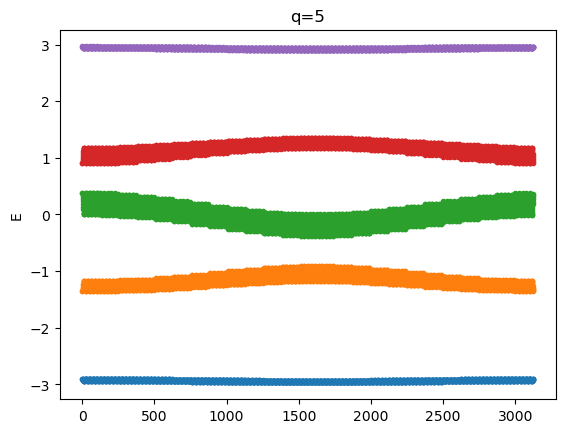

In [11]:
# Plot Energy Bands
import matplotlib.pyplot as plt
for i in range(q):
        plt.plot(EEA[:,:,i].flatten(),'.') 
plt.ylabel("E")
plt.title("q="+str(q))

In [9]:
# Diklik Bağıntısı
np.dot(np.conj(UUA[1,0,:,1]),UUA[1,0,:,1])

(0.9999999999999997+0j)

In [10]:
for bi in range(q): 
    # Caculate The Link Variables
    bj = bi # Band index  
    U1=np.zeros([Nkx,Nky],dtype=complex)
    U2=np.zeros([Nkx,Nky],dtype=complex)
    for ikx,kx in enumerate(kkx):
        for iky,ky in enumerate(kky):
            s1=np.dot(np.conj(UUA[ikx,iky,:,bi]),UUA[np.mod(ikx+1,Nkx),iky,:,bj]) 
            s2=np.dot(np.conj(UUA[ikx,iky,:,bj]),UUA[ikx,np.mod(iky+1,Nky),:,bi]) 
            U1[ikx,iky]=s1/np.abs(s1)
            U2[ikx,iky]=s2/np.abs(s2)
    # Calculate The Field Strength
#     F12=np.zeros([Nkx,Nky],dtype=complex) 
#     for ikx,kx in enumerate(kkx):
#         for iky,ky in enumerate(kky):
#             F12[ikx,iky] = U1[ikx,iky]*U2[np.mod(ikx+1,Nkx),iky]/(U1[ikx,np.mod(iky+1,Nky)]*U2[ikx,iky])
#             F12[ikx,iky] = np.log(F12[ikx,iky])
    # Alternative F12 Calculation
    F12=np.log( U1*np.roll(U2,-1,axis=0)*np.conj( np.roll(U1,-1,axis=1)*U2 ) )
    # Chern Number of Band Index
    print("Band Index:",bi)
    print(F12.sum()/(2j*np.pi))

Band Index: 0
(1+2.0147682805077216e-15j)
Band Index: 1
(1.0000000000000002+2.6576587151524637e-15j)
Band Index: 2
(-4+1.32982876513261e-16j)
Band Index: 3
(1+1.9034222658395386e-15j)
Band Index: 4
(1+7.898744414205301e-15j)


q=Çift olduğunda ortada dokunan bantların Chern sayılarının toplamlarının sıfır olması lazım. Ama bizim burda kullandığımız algoritma bunu hesaba katmıyor, dolayısıyla q=tek sayılar için sorunsuz çalışıyor.